In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_test.shape

(10000, 28, 28)

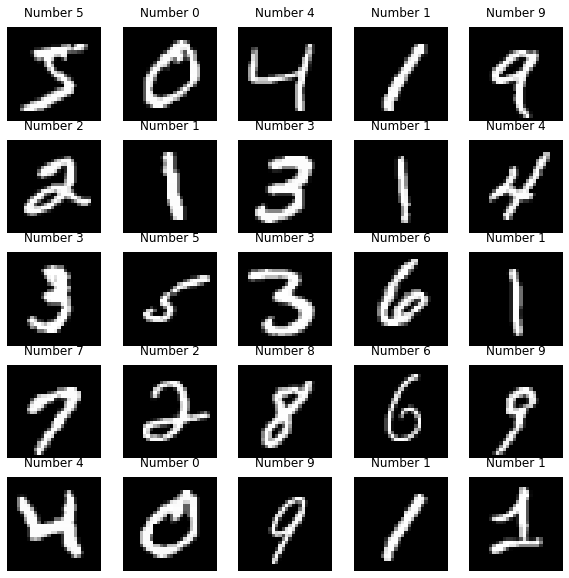

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs = plt.subplots(5, 5, figsize=(10,10))
plt.gray()
for i,a in enumerate(axs.flat):
  a.matshow(x_train[i])
  a.axis('off')
  a.set_title('Number {}'.format(y_train[i]))
fig.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)
inputshape=(28,28,1)

In [ ]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=inputshape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0150 - accuracy: 0.9948
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0123 - accuracy: 0.9958
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0095 - accuracy: 0.9966
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0128 - accuracy: 0.9959
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0116 - accuracy: 0.9959


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0830 - accuracy: 0.9855


[0.08303789049386978, 0.9854999780654907]